In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

Index(['Channel1', 'Channel2', 'Channel3', 'Channel4', 'Channel5', 'Channel6',
       'Channel7', 'Channel8', 'FilteredChannel1', 'FilteredChannel2',
       'FilteredChannel3', 'FilteredChannel4', 'FilteredChannel5',
       'FilteredChannel6', 'FilteredChannel7', 'FilteredChannel8', 'GyroX',
       'GyroY', 'GyroZ', 'AccX', 'AccY', 'AccZ', 'PPG1', 'PPG2', 'rawPPG1',
       'rawPPG2', 'rawPPG3', 'Hr', 'Hrv', 'Battery', 'Trigger',
       'PhysicalTrigger', 'AutoTrigger', 'NumMeasurements', 'Timestamp'],
      dtype='object')


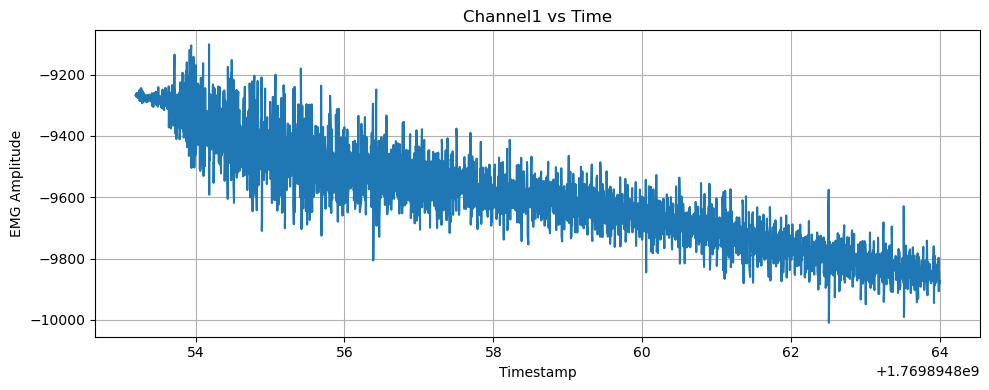

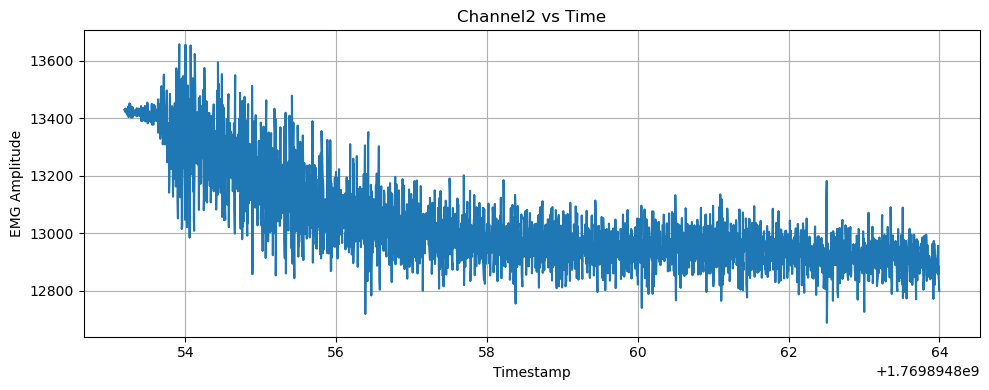

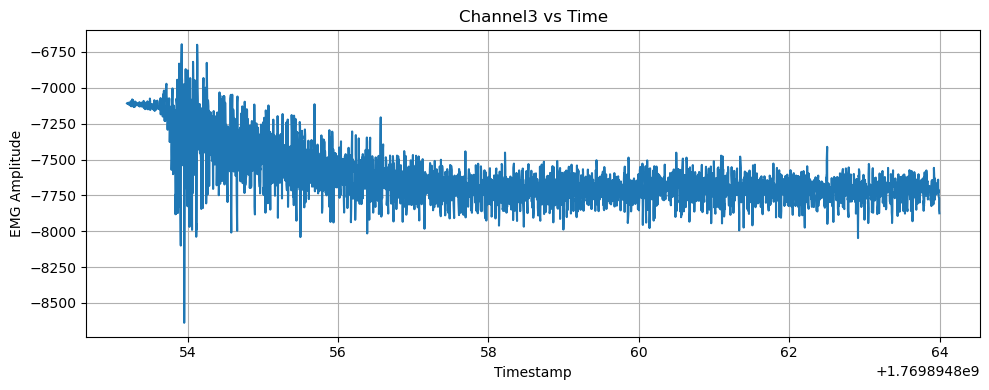

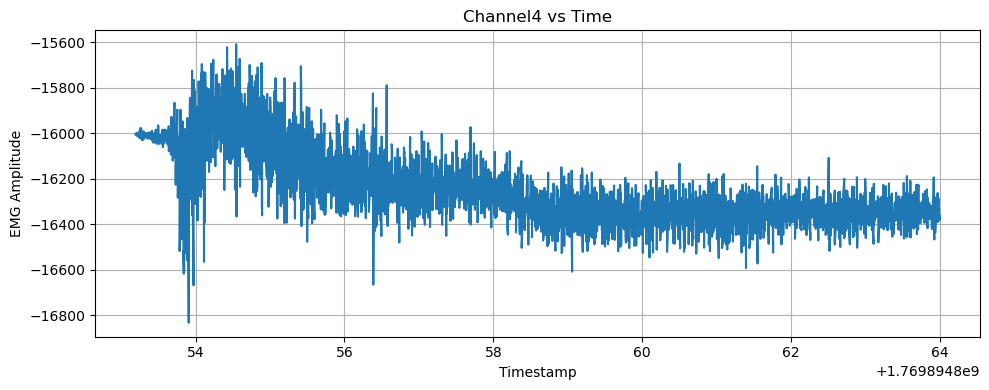

In [2]:
url = "https://raw.githubusercontent.com/EMG-ASL-TRANSLATOR-Triton-NeuroTech/core/main/CSV-Files/Test-Ricardo_Closed-Hand.csv"
df = pd.read_csv(url,sep='\t')
df.columns = df.columns.str.strip()
print(df.columns)
cols = [
    "Timestamp",
    "Channel1",
    "Channel2",
    "Channel3",
    "Channel4"
]

df_plot = df[cols]
time = df_plot["Timestamp"]

for i in range(1, 5):
    channel_name = f"Channel{i}"

    plt.figure(figsize=(10, 4))
    plt.plot(time, df_plot[channel_name])

    plt.xlabel("Timestamp")
    plt.ylabel("EMG Amplitude")
    plt.title(f"{channel_name} vs Time")

    plt.grid(True)
    plt.tight_layout()
    plt.show()

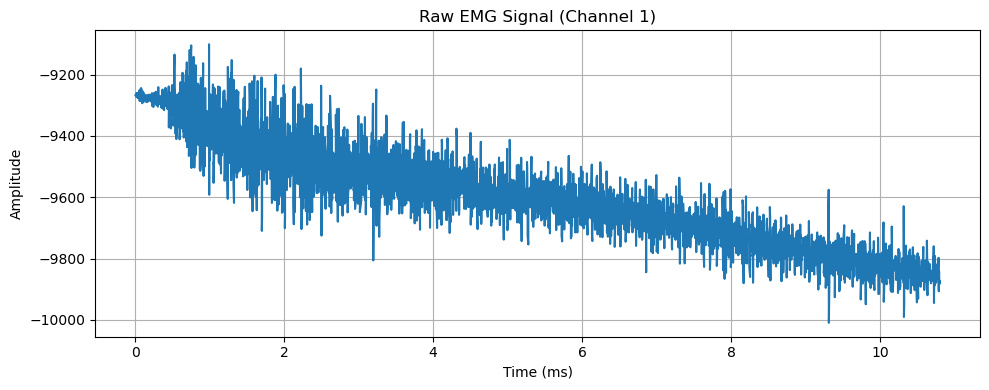

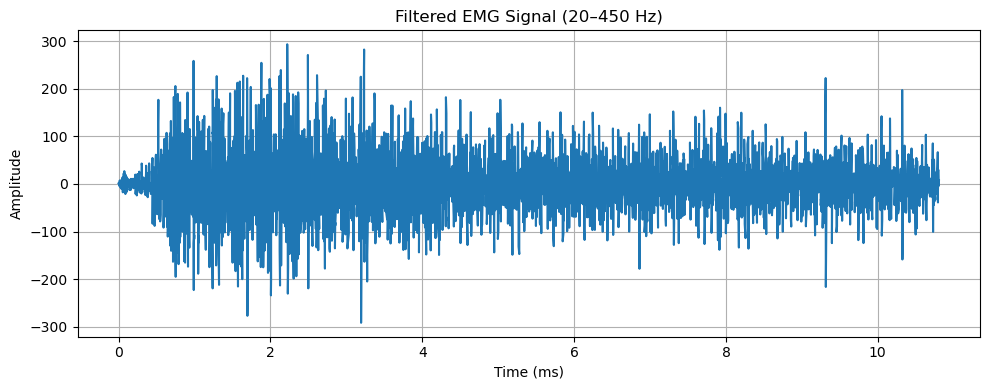

In [3]:
start_time = df["Timestamp"].iloc[0]
end_time = start_time + 1000
df_zoom = df[(df["Timestamp"] >= start_time) & (df["Timestamp"] <= end_time)]
relative_time = (df_zoom["Timestamp"] - df_zoom["Timestamp"].iloc[0])/1 
from scipy.signal import butter, filtfilt

def bandpass_filter(signal, fs, lowcut=20, highcut=450, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist

    b, a = butter(order, [low, high], btype="band")
    return filtfilt(b, a, signal) 

raw_signal = df_zoom["Channel1"].values
filtered_signal = bandpass_filter(raw_signal, 1000)

plt.figure(figsize=(10, 4))
plt.plot(relative_time, raw_signal)
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")
plt.title("Raw EMG Signal (Channel 1)")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(relative_time, filtered_signal)
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")
plt.title("Filtered EMG Signal (20–450 Hz)")
plt.grid(True)
plt.tight_layout()
plt.show()


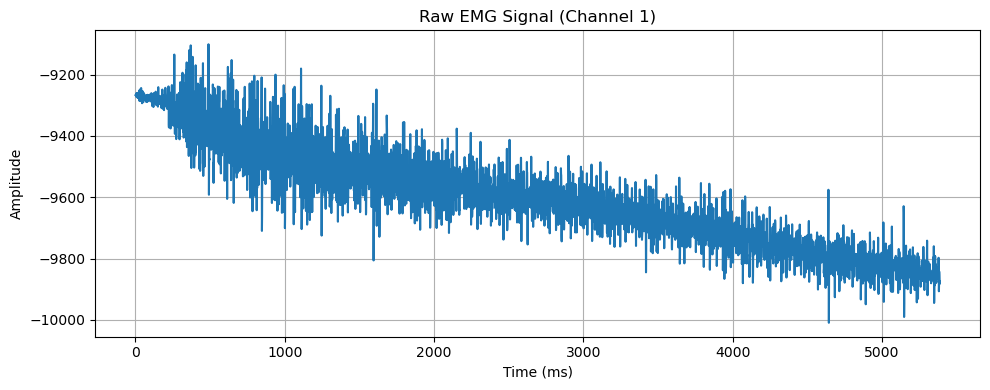

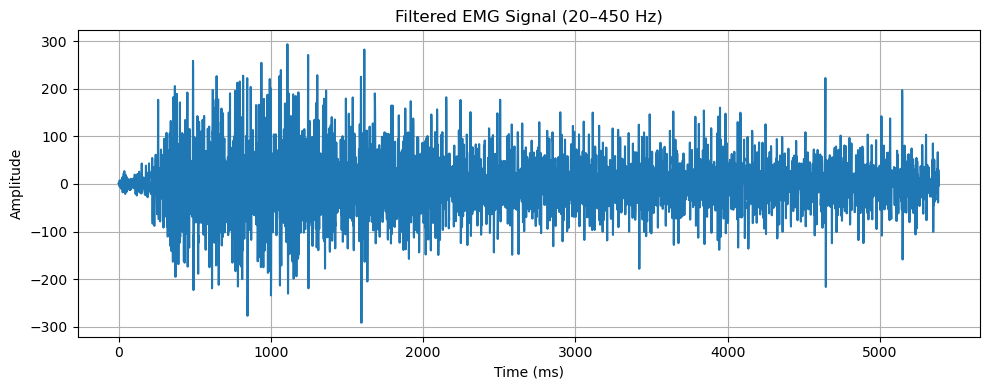

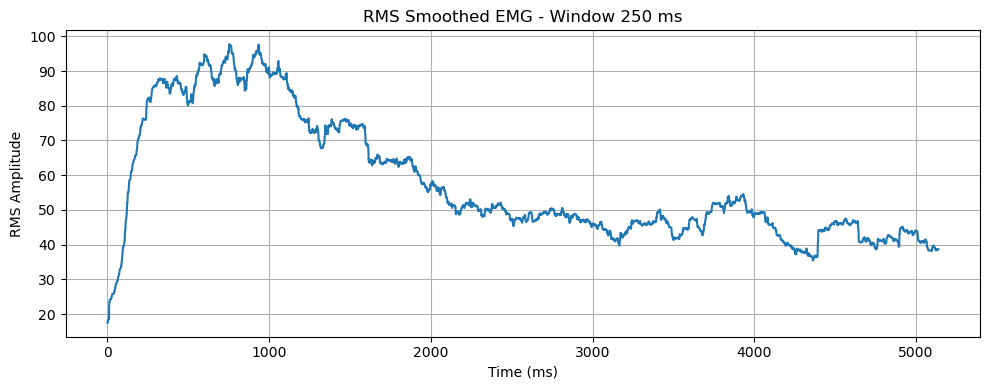

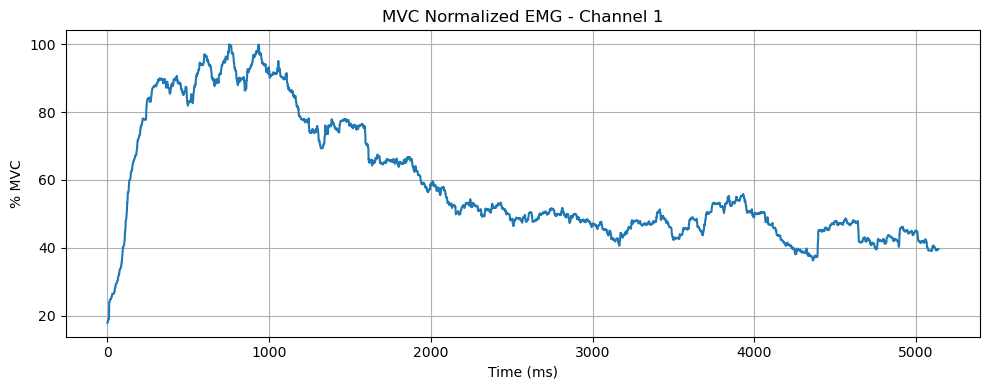

In [5]:
fs = 1000
df_zoom = df.copy()
relative_time = pd.Series(range(len(df_zoom))) / fs * 1000

raw_signal = df_zoom["Channel1"].values
filtered_signal = bandpass_filter(raw_signal, fs)

plt.figure(figsize=(10, 4))
plt.plot(relative_time, raw_signal)
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")
plt.title("Raw EMG Signal (Channel 1)")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(relative_time, filtered_signal)
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")
plt.title("Filtered EMG Signal (20–450 Hz)")
plt.grid(True)
plt.tight_layout()
plt.show()

import numpy as np

def rms_smooth(signal, window_size):
    rms = np.array([
        np.sqrt(np.mean(signal[i:i+window_size]**2))
        for i in range(len(signal) - window_size + 1)
    ])
    return rms

window_size = 250
rms_signal = rms_smooth(filtered_signal, window_size)
rms_time = relative_time.iloc[:len(rms_signal)]

plt.figure(figsize=(10, 4))
plt.plot(rms_time, rms_signal)
plt.xlabel("Time (ms)")
plt.ylabel("RMS Amplitude")
plt.title("RMS Smoothed EMG - Window 250 ms")
plt.grid(True)
plt.tight_layout()
plt.show()

# Compute MVC reference from your RMS signal
mvc_window = rms_signal[300:1000]
mvc_value = np.max(mvc_window)

# Normalize
normalized_signal = (rms_signal / mvc_value) * 100

plt.figure(figsize=(10, 4))
plt.plot(rms_time, normalized_signal)
plt.xlabel("Time (ms)")
plt.ylabel("% MVC")
plt.title("MVC Normalized EMG - Channel 1")
plt.grid(True)
plt.tight_layout()
plt.show()